In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Install pyarrow to work with feather data 
# !pip install pyarrow

## Reading and Cleaning the data

In [41]:
all_data = pd.read_feather(r"Sales_data.ftr")
all_data.head()


Series([], Name: Order Date, dtype: object)

In [14]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [15]:
# removing all the rows with any null values from the data 

all_data = all_data.dropna(how='all')
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [22]:
# dropping the duplicated columns which even have same order ID

all_data.duplicated().sum() 


618

In [23]:
final_data = all_data.drop_duplicates()
final_data.duplicated().sum()

0

## Finding best month for sale

In [32]:
# creating a separate month column for ease 

def month(dt):
    return dt.split('/')[0]

final_data['Month'] = final_data['Order Date'].apply(month) 
final_data['Month'].unique()

#there is unwanted value 'Order Date' in the data which we dont want so we create a filter

/var/folders/_8/8fddqwdn74d_7gg6vgmjw91h0000gn/T/ipykernel_57956/2354311712.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Month'] = final_data['Order Date'].apply(month)


array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [39]:
final_data = final_data[final_data['Month']!='Order Date']
final_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [ ]:
final_data.dtypes

In [48]:
final_data['Month'] = final_data['Month'].astype(int)
final_data['Quantity Ordered'] = final_data['Quantity Ordered'].astype(float)
final_data['Price Each'] = final_data['Price Each'].astype(float)

final_data.dtypes


Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [49]:
final_data['Sales'] = final_data['Quantity Ordered'] * final_data['Price Each']
final_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


<Axes: xlabel='Month'>

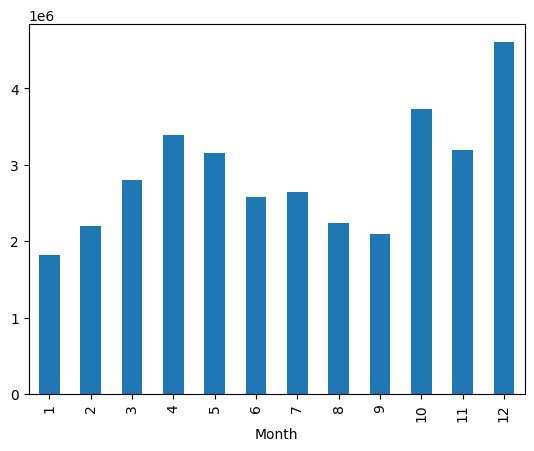

In [52]:
final_data.groupby(['Month'])['Sales'].sum().plot(kind='bar')

## Determining city giving maximum sales to the brand

In [53]:
def get_city(addr):
    return addr.split(',')[1]

In [54]:
final_data['City'] = final_data['Purchase Address'].apply(get_city)
final_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


<Axes: ylabel='City'>

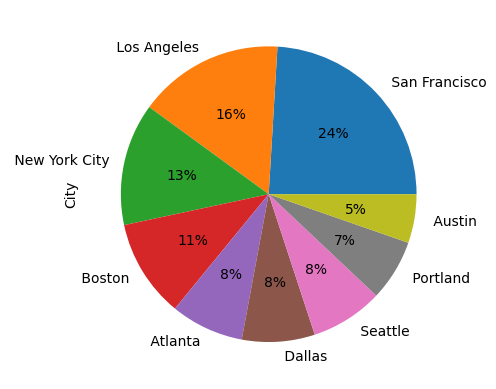

In [56]:
pd.value_counts(final_data['City']).plot(kind='pie' , autopct = '%1.0f%%') 